<a href="https://colab.research.google.com/github/d4ff4ad/Praktikum_AI_Workflow/blob/main/praktikum_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd

#Membaca File CSV
df = pd.read_csv("data_penjualan_latihan.csv")

#Menampilkan data penjualan
print(df.head(10))

      Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-02-01  Minyak Goreng               9    10         15000
1  2025-02-01          Beras               7     8         12000
2  2025-02-02           Gula               6     4         13000
3  2025-02-02         Tepung               5     6         11000
4  2025-02-03     Mie Instan              14    18          3000
5  2025-02-03           Susu               9     5          8000
6  2025-02-04          Telur              10    12         13000
7  2025-02-04          Cabai               8     9          6000
8  2025-02-05          Garam               5     6          3000
9  2025-02-05  Tepung Terigu               4     7         15000


In [17]:
# Cek apakah ada data yang kosong
print(df.isnull().sum())

# Konversi kolom "Tanggal" ke format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

# Tambahkan kolom "Total Penjualan"
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

# Tambahkan kolom "Keuntungan" (asumsi modal 10.000 per produk)
df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)

# Menampilkan hasil transformasi
print(df.head())


Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan  \
0 2025-02-01  Minyak Goreng               9    10         15000   
1 2025-02-01          Beras               7     8         12000   
2 2025-02-02           Gula               6     4         13000   
3 2025-02-02         Tepung               5     6         11000   
4 2025-02-03     Mie Instan              14    18          3000   

   Total Penjualan  Keuntungan  
0           135000       45000  
1            84000       14000  
2            78000       18000  
3            55000        5000  
4            42000      -98000  


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (X) dan target (y)
X = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int)  # 1 jika stok kurang dari 5, 0 jika cukup

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print("Akurasi Model:", accuracy_score(y_test, y_pred))


Akurasi Model: 1.0


In [20]:
#contoh produk  (jumlah terjual 8, stock 3)
produk_baru = [[8,3]]
prediksi = model.predict(produk_baru)

if prediksi[0] == 1:
  print("Produk perlu di-restok!!!")
else:
  print("Stok Masih Cukup")

Produk perlu di-restok!!!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


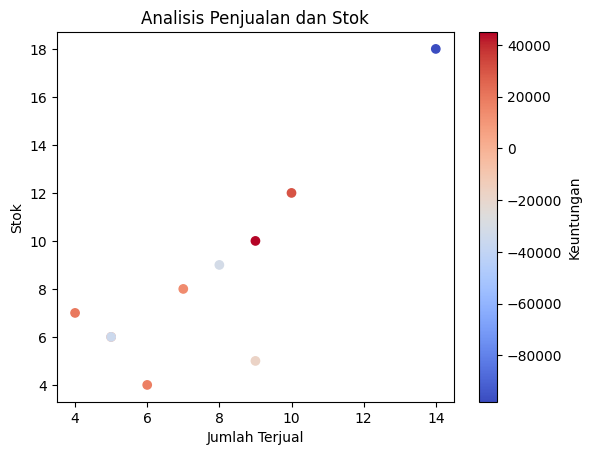

In [21]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="Keuntungan")
plt.show()